## **Descarga de Bases**

In [ ]:
from google.colab import drive

# Montamos nuestra unidad drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Nos dirigimos a la carpeta con los inputs
%cd /content/drive/My\ Drive/2021-1/TAC/TA

/content/drive/My Drive/2021-1/TAC/TA


###**Imports**

In [ ]:
import os
from matplotlib import image
from shutil import copyfile
import cv2
import seaborn as sns
import random

import PIL
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras import backend as K
import tensorflow as tf

tf.random.set_seed(0)

### **Lectura de imágenes**

In [ ]:
#!mkdir data
!cd data && unzip BSDS300-images.zip

Archive:  BSDS300-images.zip
  inflating: BSDS300/iids_train.txt  
  inflating: BSDS300/iids_test.txt   
  inflating: BSDS300/images/train/56028.jpg  
  inflating: BSDS300/images/train/370036.jpg  
  inflating: BSDS300/images/train/260081.jpg  
  inflating: BSDS300/images/train/231015.jpg  
  inflating: BSDS300/images/train/198004.jpg  
  inflating: BSDS300/images/train/286092.jpg  
  inflating: BSDS300/images/train/140055.jpg  
  inflating: BSDS300/images/train/271031.jpg  
  inflating: BSDS300/images/train/225017.jpg  
  inflating: BSDS300/images/train/24063.jpg  
  inflating: BSDS300/images/train/326038.jpg  
  inflating: BSDS300/images/train/104022.jpg  
  inflating: BSDS300/images/train/376020.jpg  
  inflating: BSDS300/images/train/71046.jpg  
  inflating: BSDS300/images/train/94079.jpg  
  inflating: BSDS300/images/train/100075.jpg  
  inflating: BSDS300/images/train/106025.jpg  
  inflating: BSDS300/images/train/22093.jpg  
  inflating: BSDS300/images/train/161062.jpg  
  infla

In [ ]:
!ls

'Copia de kaggle.ipynb'   data


In [ ]:
srcPath = '/content/drive/My Drive/2021-1/TAC/TA/data/BSDS300/images'

train_scan_paths = os.listdir(srcPath + '/train')
test_scan_paths = os.listdir(srcPath + '/test')

train_scan_paths = [(srcPath + '/train/' + x) for x in train_scan_paths]
test_scan_paths = [(srcPath + '/test/' + x) for x in test_scan_paths]


print("train scan with length of: {}".format(len(train_scan_paths)))
print("test scan with length of: {}".format(len(test_scan_paths)))

train scan with length of: 200
test scan with length of: 100


In [ ]:
train_scan_paths[:5]

['/content/drive/My Drive/2021-1/TAC/TA/data/BSDS300/images/train/56028.jpg',
 '/content/drive/My Drive/2021-1/TAC/TA/data/BSDS300/images/train/370036.jpg',
 '/content/drive/My Drive/2021-1/TAC/TA/data/BSDS300/images/train/260081.jpg',
 '/content/drive/My Drive/2021-1/TAC/TA/data/BSDS300/images/train/231015.jpg',
 '/content/drive/My Drive/2021-1/TAC/TA/data/BSDS300/images/train/198004.jpg']

In [ ]:
test_scan_paths[:5]

['/content/drive/My Drive/2021-1/TAC/TA/data/BSDS300/images/test/159008.jpg',
 '/content/drive/My Drive/2021-1/TAC/TA/data/BSDS300/images/test/58060.jpg',
 '/content/drive/My Drive/2021-1/TAC/TA/data/BSDS300/images/test/291000.jpg',
 '/content/drive/My Drive/2021-1/TAC/TA/data/BSDS300/images/test/167083.jpg',
 '/content/drive/My Drive/2021-1/TAC/TA/data/BSDS300/images/test/376043.jpg']

###**Preprocesamiento**

In [ ]:
def normalize_scan(image):

  norm_image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

  return norm_image

def resize_scan(scan, desired_width, desired_height):
  
  scan = cv2.resize(scan, (desired_height, desired_width))

  return scan

def preprocess_scan(path, width, height):
  scan = image.imread(path)
  
  resized_scan = resize_scan(scan, width, height)
  
  normalized_resized_scan = normalize_scan(resized_scan)

  return scan

In [ ]:
width = 256
height = 256

In [ ]:
train_scans = [preprocess_scan(path, width, height) for path in train_scan_paths]
test_scans = [preprocess_scan(path, width, height) for path in test_scan_paths]

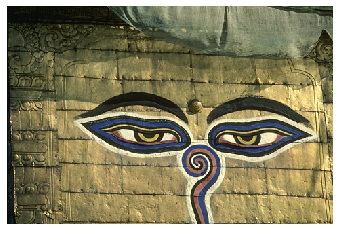

In [ ]:
data = train_scans[0]
img = plt.imshow(data, interpolation='nearest')
img.set_cmap('hot')
plt.axis('off')
plt.savefig("test.png", bbox_inches='tight')

In [ ]:
data = train_scans[0]

def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

noise_img = sp_noise(data,0.05)

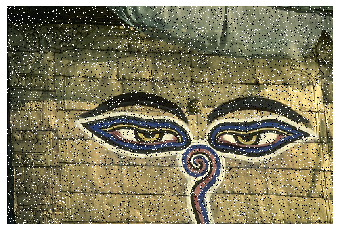

In [ ]:
img = plt.imshow(noise_img, interpolation='nearest')
img.set_cmap('hot')
plt.axis('off')
plt.savefig("test.png", bbox_inches='tight')

In [173]:
data = train_scans[0]

def gauss_noise(image):
      row,col,ch= image.shape
      mean = 0
      var = 0.1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy

gauss_img = gauss_noise(data)

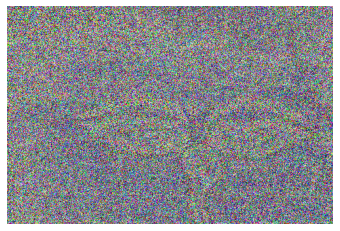

In [174]:
img = plt.imshow((gauss_img * 255).astype(np.uint8))
img.set_cmap('hot')
plt.axis('off')
plt.savefig("test.png", bbox_inches='tight')

In [180]:
def poisson_noise(img):
  noise_mask = np.random.poisson(img)

  noisy_img = img + noise_mask
  return noisy_img

data = train_scans[0]
noisy_img = poisson_noise(data)

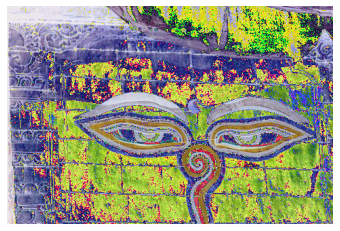

In [181]:
img = plt.imshow((noisy_img * 255).astype(np.uint8))
img.set_cmap('hot')
plt.axis('off')
plt.savefig("test.png", bbox_inches='tight')